# Предсказание сердечно-сосудистых заболеваний

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

В этом задании мы будем решать задачу предсказания наличия у человека сердечно-сосудистых заболеваний по некоторым признакам человека. Это датасет с реальными данными людей, он использовался для соревнования по машинному обучению на платформе mlbootcamp: https://mlbootcamp.ru/round/12/sandbox/

Давайте посмотрим на датасет:

In [4]:
# в этом csv файле в качестве разделителей использовалась точка с запятой, 
# не забудем указать это при вызове функции read_csv
data = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv", sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


В этом датасете данные о 70000 человек, о каждом из которых известно:

-- id человека (**id**)
-- возраст человека в днях (**age**)
-- пол (**gender**)
-- рост в сантиметрах (**height**)
-- вес в килограммах (**weight**)
-- верхнее артериальное давление (**ap_hi**)
-- нижнее артериальное давление (**ap_lo**)
-- показатель холестерина (**cholesterol**, 1, 2 или 3)
-- показатель глюкозы (**gluc**)
-- курит ли человек (**smoke**, 0--не курит, 1--курит)
-- употребляет ли человек алкоголь (**alco**, 0--нет, 1--да)
-- ведет ли активную жизнь (**active**)

Целевая переменная: **cardio** -- наличие у человека сердечно-сосудистого заболевания. 1 -- есть, 0 -- нет.

In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Часть 1. Предобработка датасета.

В этом датасете нет пропусков, так что заполнять NaN не требуется.

#### 1. Разделим данные и целевую переменную cardio.

**Задание**:

Поедлите датасет data на данные (data) и целевую переменную (y):

In [7]:
y = data['cardio']
data = data.drop(['cardio'],axis=1)

In [8]:
# не меняйте код в этой ячейке!
# эта ячейка проверяет ваш код на правильность
# если при запуске ячейка выдает ошибку, то у вас в коде ошибка

assert y.shape == (70000,)
assert set(data.columns) == set(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

#### 2. Выкинем ненужные столбцы.

В этом датасете, кажется, все признаки информативны, кроме одного -- id. Как и в Titanik, здесь id -- это просто последовательные числа, присвоенные людям при составлении датасета. Никакой информации они не несут. Давайте выкинем столбец id:

**Задание**:

Удалите из data колонку id

In [9]:
# оставьте в переменной data все столбцы, кроме id
data = data.drop(['id'],axis=1)

In [10]:
# не меняйте код в этой ячейке!
# эта ячейка проверяет ваш код на правильность
# если при запуске ячейка выдает ошибку, то у вас в коде ошибка

assert set(data.columns) == set(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

#### 3. Посмотрим на то, какого типа колонки в датасете.

In [11]:
print(data.dtypes)

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
dtype: object


Кажется, что все они числовые и категориальных признаков нет. Но давайте присмотримся: признак cholesterol содержит три вида значения: 1, 2 и 3. Они выражают три уровня холестерина. 

С одной стороны, между этими тремя уровнями есть связь: 3 > 2 > 1. C другой стороны, этот признак можно интерпретировать как категориальный и поделить его на три столбца.

Как будет лучше для решения задачи, мы не знаем. Нужно пробовать разные варианты, чем и занимаются data scientists. Давайте создадим копию наших данных, в которых поделим колонку cholesterol на три колонки:

**Задание**: 

Поделите колонку cholesterol на три колонки с помощью pd.get_dummies() и запишите полученный датасет в новую переменную data_ch:

In [12]:
data_ch = pd.get_dummies(data,columns=['cholesterol'])

In [13]:
# не меняйте код в этой ячейке!
# эта ячейка проверяет ваш код на правильность
# если при запуске ячейка выдает ошибку, то у вас в коде ошибка

assert set(data_ch.columns) == set(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'smoke',
       'alco', 'active', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3'])

#### 4. Колонка Age

На лекции мы говорили о том, что если у разных признаков в датасете разные разбросы значений.  функция расстояния KNN -- евклидова, то один признак будет влиять на расстояние между объектами больше, чем другой. У нас в датасете есть признак Age, который измеряется десятками тысяч, в то время как остальные признаки измеряются в единицах или десятках. Давайте сделаем копии датасетов data и data_cholesterol, в которых переведем возраст людей из дней в годы. Перевод осуществим просто поделив колонку Age на 365.

**Задание**:

Для копий data_age и data_ch_age датасетов data и data_ch переведите их колонки age из дней в годы, поделив колонки на 365:

In [14]:
data_age = data.copy()
data_ch_age = data_ch.copy()

data_age["age"] = data_age["age"]/365
data_ch_age["age"] = data_ch_age["age"]/365

In [15]:
# не меняйте код в этой ячейке!
# эта ячейка проверяет ваш код на правильность
# если при запуске ячейка выдает ошибку, то у вас в коде ошибка

assert 64 < data_age["age"].max() < 65 
assert 30 > data_age["age"].min() > 29
assert 54 > data_age["age"].mean() > 53

Отлично, теперь у нас есть четыре датасета:

**data** -- изначальный датасет без колонки id <br>
**data_ch** -- изначальный датасет без колонки id и обработанным признаком cholesterol <br>
**data_age** -- изначальный датасет без колонки id и колонкой age, переведенной из дней в года <br>
**data_ch_age** -- изначальный датасет без колонки id и обработанным признаком cholesterol и колонкой age, переведенной из дней в года

Осталось разбить все данные на train и val. Давайте оставим под val 30% датасета:

In [16]:
data_train, data_val, y_train, y_val = train_test_split(data, y, test_size=0.3)
data_ch_train, data_ch_val, y_ch_train, y_ch_val = train_test_split(data_ch, y, test_size=0.3)
data_age_train, data_age_val, y_age_train, y_age_val = train_test_split(data_age, y, test_size=0.3)
data_ch_age_train, data_ch_age_val, y_ch_age_train, y_ch_age_val = train_test_split(data_ch_age, y, test_size=0.3)

## Часть 2. Обучение KNN

В качестве метрики качества для нашей задачи мы возьмем не accuracy, а log_loss: http://wiki.fast.ai/index.php/Log_Loss

log_loss -- это метрика для бинарной классификации (для многоклассовой ее использовать нельзя). Она принимает на вход реальные метки класса в виде нулей и единиц и вероятности принадлежности элементов первому классу, выданные алгоритмом.

В sklearn метрика log_loss определена в sklearn.metrics (как и accuracy и многие другие метрики). Чем log_loss ниже, тем ответы алгоритма "лучше" (в отличие от accuracy). 

**Задание**:

Обучите KNN для k=3 на каждом из четырех полученных датасетов и проверьте каждую обученную модель на тесте для метрики log_loss. На каком датасете KNN с k=3 показал себя лучше всего?

Обратите внимание, что для метрики log_loss ответы KNN должны быть в виде вероятностей принадлежности классу 1 (полученными с помощью .predict_proba), а не бинарными!

In [18]:
# обучаем КНН на тренировочной части data_train датасета data
# получаем ответы КНН на валидационной части data_val датасета data
# predict_proba выдает массив пар -- для каждого объекта соответствующая пара 
# это вероятности его принадлежности к классу 0 и классу 1. 
# Чтобы получить только вероятности принадлежности классу 1, 
# нужно взять 1 столбец полученного numpy array: array[:, 1]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train, y_train)
pred_1 = knn.predict_proba(data_val)[:, 1]

knn.fit(data_ch_train, y_ch_train)
pred_2 = knn.predict_proba(data_ch_val)[:, 1]

knn.fit(data_age_train, y_age_train)
pred_3 = knn.predict_proba(data_age_val)[:, 1]

knn.fit(data_ch_age_train, y_ch_age_train)
pred_4 = knn.predict_proba(data_ch_age_val)[:, 1]

In [21]:
loss_1 = log_loss(y_val, pred_1)
loss_2 = log_loss(y_ch_val, pred_2)
loss_3 = log_loss(y_age_val, pred_3)
loss_4 = log_loss(y_ch_age_val, pred_4)
print(loss_1, loss_2, loss_3, loss_4)

4.277472551320464 4.235563995808637 4.143289829910354 4.179577516370444


Мы видим, что во всех четырех случаях log_loss получился довольно большим. Давайте подберем гиперпараметр k, чтобы алгоритм лучше работал:

## Часть 3. Подбор параметра k

**Задание**:

Для датасетов data_train и data_ch_age_train обучите KNN на тренировочных выборках и найдите значения log_loss на валидационных выборках для значений k от 1 до 20 и постройте график зависимости log_loss от k (как на практическом занятии). Свои выводы опишите ниже.

In [24]:
loss_data = []
loss_data_ch_age = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, y_train)
    pred = knn.predict_proba(data_val)[:, 1]
    loss_data.append(log_loss(y_val, pred))
    #
    knn.fit(data_ch_age_train, y_ch_age_train)
    pred = knn.predict_proba(data_ch_age_val)[:, 1]
    loss_data_ch_age.append(log_loss(y_ch_age_val, pred))

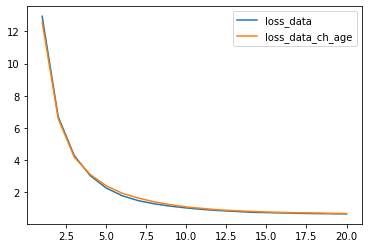

In [30]:
fig, ax = plt.subplots()
x = list(range(1, 21))
ax.plot(x, loss_data, label = 'loss_data')
ax.plot(x, loss_data_ch_age, label = 'loss_data_ch_age')
ax.legend()

plt.show()

Сделайте выводы -- как вы думаете, почему зависимость log_loss от k получилась такой?

**Чем больше соседей мы включаем в расчет, тем больше разнообразие представителей каждого класса и тем, соответственно, точнее наша модель.**

P.S. Если вы посмотрите на лидерборд в соревновании к этому датасету, то увидите, что участники достигли значений log_loss гораздо меньших, чем получилось у нас. Но не переживайте -- мы особо не старались предобрабатывать датасет, и модель KNN -- одна из самых слабых в машинном обучении. В следующих модулях вы познакомитесь с более сильными моделями.